In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc
import warnings
import os

if os.name == 'nt':
    print("This is a Windows environment.")
    rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    print("This is a Mac or Linux environment.")
    rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings("ignore", category=UserWarning)

This is a Mac or Linux environment.


In [29]:
cctv = pd.read_excel('./data/서울시 자치구 (연도별) CCTV 설치현황_240630.xlsx')
cctv.head()

,순번,구분,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년\n6.30.
0,NaN,계,102380,11692,8225,10865,10652,12854,11838,9558,9218,13919,3559
1,1.0,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,2.0,중구,3021,376,220,366,381,155,357,414,137,135,480
3,3.0,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,4.0,성동구,4514,542,278,939,457,640,483,366,233,471,105


In [30]:
cctv.drop(index=[0], columns=["순번", "총 계", "2024년\n6.30."], inplace=True)
cctv.reset_index(drop=True, inplace=True)
cctv.head()

,구분,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,230,100,140,140,66,233,85,219,919
1,중구,376,220,366,381,155,357,414,137,135
2,용산구,106,295,491,147,335,473,486,413,492
3,성동구,542,278,939,457,640,483,366,233,471
4,광진구,403,42,666,460,712,191,740,273,340


In [31]:
cctv['CCTV합계'] = cctv['2016년 이전 설치된 CCTV '] + cctv['2016년'] + cctv['2017년'] + cctv['2018년'] + cctv['2019년'] + cctv['2020년'] + cctv['2021년'] + cctv["2022년"] + cctv['2023년']
cctv.head()

,구분,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,CCTV합계
0,종로구,230,100,140,140,66,233,85,219,919,2132
1,중구,376,220,366,381,155,357,414,137,135,2541
2,용산구,106,295,491,147,335,473,486,413,492,3238
3,성동구,542,278,939,457,640,483,366,233,471,4409
4,광진구,403,42,666,460,712,191,740,273,340,3827


In [32]:
cctv.rename(columns={"구분" : "시군구"}, inplace=True)
cctv = cctv[['시군구', 'CCTV합계']]
cctv.head()

,시군구,CCTV합계
0,종로구,2132
1,중구,2541
2,용산구,3238
3,성동구,4409
4,광진구,3827


In [33]:
area = pd.read_excel('./data/행정구역(구별)_20241215143907.xlsx')
area.drop(columns='자치구별(1)', index=[0,2], inplace=True)
area.columns = area.loc[1, :]
area.drop(index=1, inplace=True)
area.reset_index(drop=True, inplace=True)
area.rename(columns={"자치구별(2)" : '시군구'}, inplace=True)
area.head()

1,시군구,면적 (km²),구성비 (%),행정,법정,소계,소계
0,종로구,23.91,3.95,17,87,279,1475
1,중구,9.96,1.65,15,74,256,1568
2,용산구,21.87,3.61,16,36,357,2599
3,성동구,16.82,2.78,17,17,471,3645
4,광진구,17.06,2.82,15,7,370,3012


In [34]:
area = area[['시군구', '면적 (km²)', '구성비 (%)']]
area.head()

1,시군구,면적 (km²),구성비 (%)
0,종로구,23.91,3.95
1,중구,9.96,1.65
2,용산구,21.87,3.61
3,성동구,16.82,2.78
4,광진구,17.06,2.82


In [35]:
# 노령화 지수
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['시군구', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,시군구,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


In [36]:
old_pop = pd.read_excel('./data/자치구별+연령계층별+인구구성비(추계인구)_20241108190613.xlsx')
old_pop.drop(index=[0, 1], inplace=True)
old_pop.columns = ['시군구', '유소년인구', '생산가능인구', '고령인구']
old_pop.reset_index(drop=True, inplace=True)
old_pop.head()

,시군구,유소년인구,생산가능인구,고령인구
0,종로구,7,74.1,18.9
1,중구,6.8,73.6,19.6
2,용산구,8.6,74.1,17.3
3,성동구,8.9,73.8,17.3
4,광진구,7.7,76.1,16.2


In [37]:
pop = pd.read_excel('./data/자치구별+고령인구(추계인구)_20241019165325.xlsx')
pop.drop(index=[0, 1, 2], columns=['자치구별(1)'], inplace=True)
pop.columns = ["시군구", "노령인구_전체", "노령인구_남자", "노령인구_여자"]
pop.reset_index(drop=True, inplace=True)

pop.head()

,시군구,노령인구_전체,노령인구_남자,노령인구_여자
0,종로구,27187,11986,15201
1,중구,24374,10637,13737
2,용산구,37740,16395,21345
3,성동구,47907,21034,26873
4,광진구,55697,24952,30745


In [38]:
merged_cctv = cctv.merge(right=area, right_on='시군구', left_on='시군구')
merged_cctv = merged_cctv.merge(right=old_point, right_on='시군구', left_on='시군구')
merged_cctv = merged_cctv.merge(right=old_pop, right_on='시군구', left_on='시군구')
merged_cctv = merged_cctv.merge(right=pop, right_on='시군구', left_on='시군구')

merged_cctv.head()

,시군구,CCTV합계,면적 (km²),구성비 (%),합계,남자,여자,유소년인구,생산가능인구,고령인구,노령인구_전체,노령인구_남자,노령인구_여자
0,종로구,2132,23.91,3.95,267.8,237.3,298,7,74.1,18.9,27187,11986,15201
1,중구,2541,9.96,1.65,286.5,245.3,329.3,6.8,73.6,19.6,24374,10637,13737
2,용산구,3238,21.87,3.61,200.7,172.2,230,8.6,74.1,17.3,37740,16395,21345
3,성동구,4409,16.82,2.78,193.4,167.5,219.9,8.9,73.8,17.3,47907,21034,26873
4,광진구,3827,17.06,2.82,211.1,183.7,240.1,7.7,76.1,16.2,55697,24952,30745


In [39]:
merged_cctv = merged_cctv[['시군구', 'CCTV합계', '면적 (km²)', '합계', '고령인구', '노령인구_전체']]
merged_cctv = merged_cctv.rename(columns={'합계' : "고령화지수"})

merged_cctv.head()

,시군구,CCTV합계,면적 (km²),고령화지수,고령인구,노령인구_전체
0,종로구,2132,23.91,267.8,18.9,27187
1,중구,2541,9.96,286.5,19.6,24374
2,용산구,3238,21.87,200.7,17.3,37740
3,성동구,4409,16.82,193.4,17.3,47907
4,광진구,3827,17.06,211.1,16.2,55697


In [40]:
merged_cctv['CCTV비율'] = merged_cctv['CCTV합계'] / merged_cctv['면적 (km²)']
merged_cctv

,시군구,CCTV합계,면적 (km²),고령화지수,고령인구,노령인구_전체,CCTV비율
0,종로구,2132,23.91,267.8,18.9,27187,89.167712
1,중구,2541,9.96,286.5,19.6,24374,255.120482
2,용산구,3238,21.87,200.7,17.3,37740,148.056699
3,성동구,4409,16.82,193.4,17.3,47907,262.128419
4,광진구,3827,17.06,211.1,16.2,55697,224.325909
5,동대문구,3268,14.22,234.7,18.8,64397,229.817159
6,중랑구,4512,18.5,246.4,20,75516,243.891892
7,성북구,3873,24.58,193.5,18.1,77708,157.567128
8,강북구,3531,23.6,321.1,23.2,65980,149.618644
9,도봉구,2378,20.65,278.5,22.6,67786,115.157385


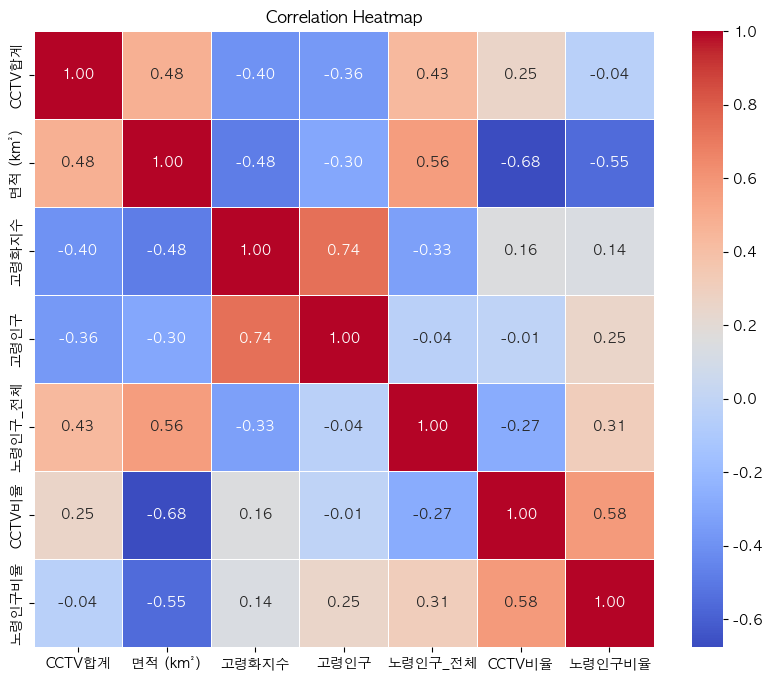

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 계산
correlation = merged_cctv.iloc[:, 1:].corr()

# Heatmap 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

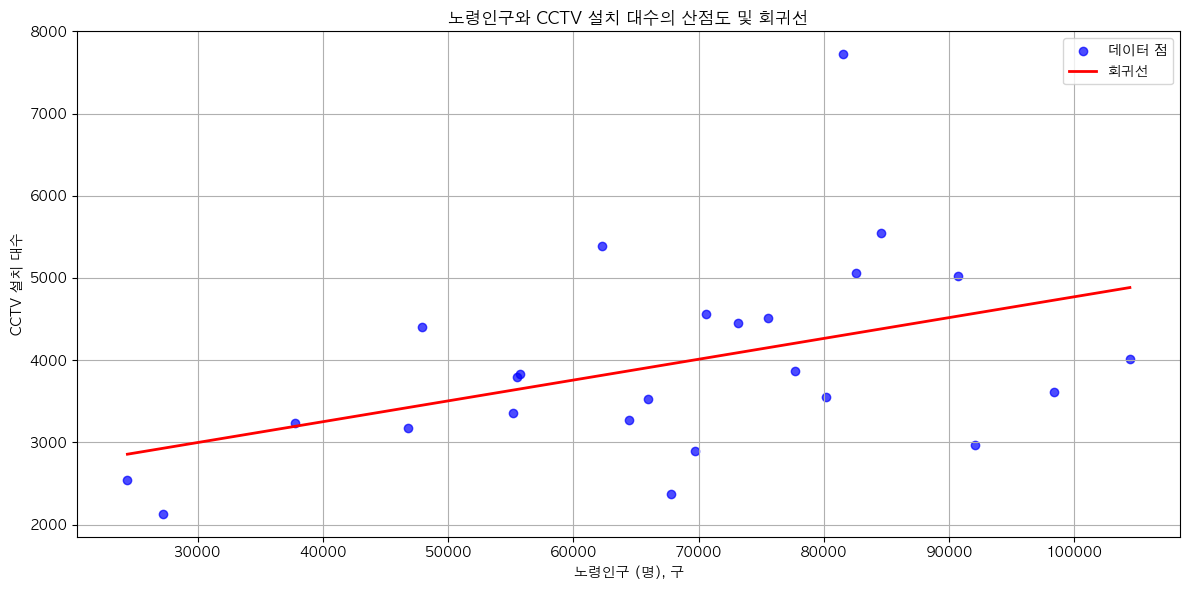

In [ ]:
import numpy as np

sorted_merge = merged_cctv.sort_values(by='노령인구_전체', ascending=False)

x = pd.to_numeric(sorted_merge['노령인구_전체'], errors='coerce')  # 숫자형으로 변환
y = pd.to_numeric(sorted_merge['CCTV합계'], errors='coerce')      # 숫자형으로 변환

coefficients = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coefficients)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label="데이터 점")
plt.plot(x, linear_fit(x), color='red', linewidth=2, label="회귀선")

plt.title("노령인구와 CCTV 설치 대수의 산점도 및 회귀선")
plt.xlabel("노령인구 (명), 구")
plt.ylabel("CCTV 설치 대수")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
